## For starters uncomment the code below to make sure you've downloaded all the required packages

In [1]:
# !pip install pandas numpy seaborn matplotlib tensorflow tqdm scikit-learn s

# After all of the installations are done, please restart the kernel. This can be found on the top button with the function saying `Restart the Kernel`

In [2]:
import pandas as pd # Library for data manipulation and analysis, particularly useful for handling tabular data with heterogeneously-typed columns
import numpy as np # Fundamental package for scientific computing with Python; used for working with arrays and matrices
import seaborn as sns # Visualization library based on matplotlib, provides a high-level interface for drawing attractive and informative statistical graphics
import random # Provides functions that support generating random numbers, shuffling sequences randomly and choosing random items
import time # Provides various time-related functions; used to measure the time intervals in your code
import math # Provides access to the mathematical functions defined by the C standard
import matplotlib.pyplot as plt # Library for creating static, interactive, and animated visualizations in Python
import tensorflow as tf # Open source library for numerical computation and large-scale machine learning that makes it easy to use and deploy machine learning models
from datetime import datetime # Used to work with dates and times in Python; useful for timestamps and time-related operations
from tqdm import tqdm # A tool that provides progress bars for loops; useful for tracking iteration progress if loops take time to complete
from sklearn.linear_model import LinearRegression # Part of the scikit-learn library, used for performing linear regression in Python
from tensorflow import keras # High-level neural networks API running on top of TensorFlow, used for building and training deep learning models
from tensorflow.keras import layers # Modules in keras used to create deep learning models layer-by-layer

## MAPE
What is MAPE?
MAPE stands for Mean Absolute Percentage Error. It is a statistical measure used to calculate the accuracy of a model in forecasting. It shows the error as a percentage, which helps in understanding the size of the errors in terms of percentage of the actual values.

- Mean: It calculates the average of individual errors.
- Absolute: It takes the absolute values of the errors which ensures that both positive and negative errors are treated equally.
- Percentage: It converts the errors into a percentage form relative to the actual values.
- Error: Difference between what was actually observed (actual values) and what the model predicted.

In [3]:
# def MAPE(actual, prediction):
#     """
#     Calculate the Mean Absolute Percentage Error (MAPE) between two lists.

#     MAPE is a measure of prediction accuracy of a forecasting method in statistics,
#     specifically trending markets. It expresses accuracy as a percentage, and is defined
#     by the formula: MAPE = (1/n) * Σ(|actual - prediction| / |actual|) * 100

#     Parameters:
#     - actual (list or array-like): The actual data points. Must be 1-dimensional and 
#       the same length as 'prediction'.
#     - prediction (list or array-like): The predicted data points, which correspond to 
#       'actual'. Must be 1-dimensional and the same length as 'actual'.

#     Returns:
#     - float: The mean absolute percentage error (MAPE) as a percentage, rounded to two decimal places.

#     Example:
#     >>> MAPE([100, 200, 300], [90, 205, 295])
#     3.33
#     """
#     absolute_value = list(map(lambda x, y: abs(x-y), actual, prediction))
#     division_value = list(map(lambda x, y: x/y, absolute_value, actual))
#     return round(np.mean(division_value)*100, 2)

def MAPE(actual, prediction):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) between two lists.
    
    MAPE is a measure of prediction accuracy of a forecasting method in statistics,
    specifically trending markets. It expresses accuracy as a percentage, and is defined
    by the formula: MAPE = (1/n) * Σ(|actual - prediction| / |actual|) * 100
    
    Parameters:
    - actual (list or array-like): The actual data points. Must be 1-dimensional and 
      the same length as 'prediction'.
    - prediction (list or array-like): The predicted data points, which correspond to 
      'actual'. Must be 1-dimensional and the same length as 'actual'.

    Returns:
    - float: The mean absolute percentage error (MAPE) as a percentage, rounded to two decimal places.
    """
    actual, prediction = np.array(actual), np.array(prediction)
    if np.any(actual == 0):
        raise ValueError("MAPE is undefined for zero actual values because of division by zero")
    mape = np.mean(np.abs((actual - prediction) / actual)) * 100
    return round(mape, 2)

## Importing the Dataset
For today's study jam, we are using a custom risk score assessment dataset that have been cleaned from a e-commerce company

In [4]:
import pandas as pd

# Path to the Excel file
# NOTE: File_path should be the file path where you store the dataset
file_path = "C:\\Users\\Imman\\Documents\\BI Hackathon 2024\\IDX KOMPAS 100 Historical Data.xlsx"

# For MacOS or Linux, the file path may look like this
# file_path = "../Downloads/Random Sample Risk Data - ML Study Jam Cyber Security.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

# Display the sampled DataFrame
df

Date    Price     Open     High      Low   Vol.  Change %
0    2024-04-25  1129.96  1136.70  1137.47  1128.86  5.41B   -0.0067
1    2024-04-24  1137.54  1137.51  1142.94  1132.17  6.39B    0.0030
2    2024-04-23  1134.12  1131.71  1144.23  1130.75  6.95B    0.0074
3    2024-04-22  1125.84  1126.13  1131.50  1117.09  5.89B    0.0027
4    2024-04-19  1122.79  1132.91  1134.85  1115.94  8.17B   -0.0147
...         ...      ...      ...      ...      ...    ...       ...
2430 2014-05-02  1049.88  1051.20  1055.51  1049.65  2.38B    0.0001
2431 2014-04-30  1049.74  1050.41  1053.13  1047.55  2.61B    0.0033
2432 2014-04-29  1046.31  1045.15  1047.86  1041.67  2.52B   -0.0011
2433 2014-04-28  1047.47  1066.31  1067.97  1047.47  2.52B   -0.0181
2434 2014-04-25  1066.82  1066.73  1072.63  1066.05  2.78B    0.0007

[2435 rows x 7 columns]

In [5]:
df.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %           float64
dtype: object

In [6]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extracting Year, Month, and Day from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['unique_id'] = range(len(df), 0, -1)

# Adding 'Day name' where 0 is Sunday and 6 is Saturday
df['Day name'] = df['Date'].dt.dayofweek.apply(lambda x: (x+2) % 7)

# Displaying the DataFrame to verify the new columns
df

Date    Price     Open     High      Low   Vol.  Change %  Year  \
0    2024-04-25  1129.96  1136.70  1137.47  1128.86  5.41B   -0.0067  2024   
1    2024-04-24  1137.54  1137.51  1142.94  1132.17  6.39B    0.0030  2024   
2    2024-04-23  1134.12  1131.71  1144.23  1130.75  6.95B    0.0074  2024   
3    2024-04-22  1125.84  1126.13  1131.50  1117.09  5.89B    0.0027  2024   
4    2024-04-19  1122.79  1132.91  1134.85  1115.94  8.17B   -0.0147  2024   
...         ...      ...      ...      ...      ...    ...       ...   ...   
2430 2014-05-02  1049.88  1051.20  1055.51  1049.65  2.38B    0.0001  2014   
2431 2014-04-30  1049.74  1050.41  1053.13  1047.55  2.61B    0.0033  2014   
2432 2014-04-29  1046.31  1045.15  1047.86  1041.67  2.52B   -0.0011  2014   
2433 2014-04-28  1047.47  1066.31  1067.97  1047.47  2.52B   -0.0181  2014   
2434 2014-04-25  1066.82  1066.73  1072.63  1066.05  2.78B    0.0007  2014   

      Month  Day  unique_id  Day name  
0         4   25       2435         5  
1         4   24       2434         4  
2         4   23       2433         3  
3         4   22       2432         2  
4         4   19       2431         6  
...     ...  ...        ...       ...  
2430      5    2          5         6  
2431      4   30          4         4  
2432      4   29          3         3  
2433      4   28          2         2  
2434      4   25          1         6  

[2435 rows x 12 columns]

In [7]:
df_cp = df['Price']
# Drop the "Closing Price" column
df = df.drop('Price', axis=1)

# Create the "Date" column in "yyyy-mm-dd" format
# df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Rejoin the "Closing Price" column (assuming you have it in another DataFrame)
closing_prices_df = pd.DataFrame(df_cp)
df = df.join(closing_prices_df)
df

Date     Open     High      Low   Vol.  Change %  Year  Month  Day  \
0    2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024      4   25   
1    2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024      4   24   
2    2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024      4   23   
3    2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024      4   22   
4    2024-04-19  1132.91  1134.85  1115.94  8.17B   -0.0147  2024      4   19   
...         ...      ...      ...      ...    ...       ...   ...    ...  ...   
2430 2014-05-02  1051.20  1055.51  1049.65  2.38B    0.0001  2014      5    2   
2431 2014-04-30  1050.41  1053.13  1047.55  2.61B    0.0033  2014      4   30   
2432 2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014      4   29   
2433 2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014      4   28   
2434 2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014      4   25   

      unique_id  Day name    Price  
0          2435         5  1129.96  
1          2434         4  1137.54  
2          2433         3  1134.12  
3          2432         2  1125.84  
4          2431         6  1122.79  
...         ...       ...      ...  
2430          5         6  1049.88  
2431          4         4  1049.74  
2432          3         3  1046.31  
2433          2         2  1047.47  
2434          1         6  1066.82  

[2435 rows x 12 columns]

In [8]:
# Sort the DataFrame by "Date" column in descending order
df = df.sort_values(by='Date', ascending=False)

# Print the sorted DataFrame
df

Date     Open     High      Low   Vol.  Change %  Year  Month  Day  \
0    2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024      4   25   
1    2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024      4   24   
2    2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024      4   23   
3    2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024      4   22   
4    2024-04-19  1132.91  1134.85  1115.94  8.17B   -0.0147  2024      4   19   
...         ...      ...      ...      ...    ...       ...   ...    ...  ...   
2430 2014-05-02  1051.20  1055.51  1049.65  2.38B    0.0001  2014      5    2   
2431 2014-04-30  1050.41  1053.13  1047.55  2.61B    0.0033  2014      4   30   
2432 2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014      4   29   
2433 2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014      4   28   
2434 2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014      4   25   

      unique_id  Day name    Price  
0          2435         5  1129.96  
1          2434         4  1137.54  
2          2433         3  1134.12  
3          2432         2  1125.84  
4          2431         6  1122.79  
...         ...       ...      ...  
2430          5         6  1049.88  
2431          4         4  1049.74  
2432          3         3  1046.31  
2433          2         2  1047.47  
2434          1         6  1066.82  

[2435 rows x 12 columns]

In [9]:
# Assuming df is your DataFrame
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
df.set_index('Date', inplace=True)

# Create a continuous date range from min to max date in the dataset
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

# Identify missing dates
missing_dates = date_range.difference(df.index)

# Define the 'holidays' DataFrame using the missing dates
holidays_df = pd.DataFrame({
    'holiday': missing_dates.strftime('%Y%b%d'),
    'ds': missing_dates,
    'Price': 0,  # Adjust these values as per your requirement
    })

# df.set_index('Date', inplace=False)
# Reset the index and move 'Date' back to a regular column
df.reset_index(inplace=True)

In [10]:
holidays_df

holiday         ds  Price
0     2014Apr26 2014-04-26      0
1     2014Apr27 2014-04-27      0
2     2014May01 2014-05-01      0
3     2014May03 2014-05-03      0
4     2014May04 2014-05-04      0
...         ...        ...    ...
1214  2024Apr13 2024-04-13      0
1215  2024Apr14 2024-04-14      0
1216  2024Apr15 2024-04-15      0
1217  2024Apr20 2024-04-20      0
1218  2024Apr21 2024-04-21      0

[1219 rows x 3 columns]

In [11]:
df

Date     Open     High      Low   Vol.  Change %  Year  Month  Day  \
0    2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024      4   25   
1    2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024      4   24   
2    2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024      4   23   
3    2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024      4   22   
4    2024-04-19  1132.91  1134.85  1115.94  8.17B   -0.0147  2024      4   19   
...         ...      ...      ...      ...    ...       ...   ...    ...  ...   
2430 2014-05-02  1051.20  1055.51  1049.65  2.38B    0.0001  2014      5    2   
2431 2014-04-30  1050.41  1053.13  1047.55  2.61B    0.0033  2014      4   30   
2432 2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014      4   29   
2433 2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014      4   28   
2434 2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014      4   25   

      unique_id  Day name    Price  
0          2435         5  1129.96  
1          2434         4  1137.54  
2          2433         3  1134.12  
3          2432         2  1125.84  
4          2431         6  1122.79  
...         ...       ...      ...  
2430          5         6  1049.88  
2431          4         4  1049.74  
2432          3         3  1046.31  
2433          2         2  1047.47  
2434          1         6  1066.82  

[2435 rows x 12 columns]

## Data Interpolation

## Fill in the data first

In [12]:
from scipy.interpolate import Akima1DInterpolator

# Assuming 'df' is already defined and includes a 'Date' and 'Closing Price' column
df.set_index('Date', inplace=True)

# Create a continuous date range from min to max date in the dataset
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

# Reindex the dataframe with the full date range, filling non-existing dates with NaNs
data_full = df.reindex(date_range)

# Prepare data for interpolation
# Dropping NaNs because Akima interpolation cannot handle NaNs directly
x = np.arange(len(data_full))
y = data_full['Price'].values
mask = ~np.isnan(y)
x, y = x[mask], y[mask]

# Create an Akima interpolator
akima_interpolator = Akima1DInterpolator(x, y)

# Interpolate the results for the full range
data_full['y'] = akima_interpolator(np.arange(len(data_full)))

# Generate a list of columns to forward fill, excluding 'Date' and 'Price'
# 'Date' is not listed as it's the index, and 'Price' is explicitly handled above
columns_to_ffill = [col for col in df.columns if col not in ['Price']]

# Forward fill the other columns where applicable
data_full[columns_to_ffill] = data_full[columns_to_ffill].ffill()

# Save or display the result
# data_full.to_excel('Interpolated_Data.xlsx')
print(data_full.head())


               Open     High      Low   Vol.  Change %    Year  Month   Day  \
2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0  25.0   
2014-04-26  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0  25.0   
2014-04-27  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0  25.0   
2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014.0    4.0  28.0   
2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014.0    4.0  29.0   

            unique_id  Day name    Price            y  
2014-04-25        1.0       6.0  1066.82  1066.820000  
2014-04-26        1.0       6.0      NaN  1058.565022  
2014-04-27        1.0       6.0      NaN  1052.073378  
2014-04-28        2.0       2.0  1047.47  1047.470000  
2014-04-29        3.0       3.0  1046.31  1046.310000  


In [13]:
data_full = data_full.drop('Price', axis = 1)
data_full

Open     High      Low   Vol.  Change %    Year  Month   Day  \
2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0  25.0   
2014-04-26  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0  25.0   
2014-04-27  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0  25.0   
2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014.0    4.0  28.0   
2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014.0    4.0  29.0   
...             ...      ...      ...    ...       ...     ...    ...   ...   
2024-04-21  1132.91  1134.85  1115.94  8.17B   -0.0147  2024.0    4.0  19.0   
2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024.0    4.0  22.0   
2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024.0    4.0  23.0   
2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024.0    4.0  24.0   
2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024.0    4.0  25.0   

            unique_id  Day name            y  
2014-04-25        1.0       6.0  1066.820000  
2014-04-26        1.0       6.0  1058.565022  
2014-04-27        1.0       6.0  1052.073378  
2014-04-28        2.0       2.0  1047.470000  
2014-04-29        3.0       3.0  1046.310000  
...               ...       ...          ...  
2024-04-21     2431.0       6.0  1121.311137  
2024-04-22     2432.0       2.0  1125.840000  
2024-04-23     2433.0       3.0  1134.120000  
2024-04-24     2434.0       4.0  1137.540000  
2024-04-25     2435.0       5.0  1129.960000  

[3654 rows x 11 columns]

In [14]:
data_full.reset_index(inplace=True)
data_full.rename(columns={'index': 'Date'}, inplace=True)

# Convert the 'Date' column to datetime type if it's not already
data_full['Date'] = pd.to_datetime(data_full['Date'])
# data_full['Price'] = data_full['Price'].str.replace('.', '').str.replace(',', '.').astype(float)
data_full

Date     Open     High      Low   Vol.  Change %    Year  Month  \
0    2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
1    2014-04-26  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
2    2014-04-27  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
3    2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014.0    4.0   
4    2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014.0    4.0   
...         ...      ...      ...      ...    ...       ...     ...    ...   
3649 2024-04-21  1132.91  1134.85  1115.94  8.17B   -0.0147  2024.0    4.0   
3650 2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024.0    4.0   
3651 2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024.0    4.0   
3652 2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024.0    4.0   
3653 2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024.0    4.0   

       Day  unique_id  Day name            y  
0     25.0        1.0       6.0  1066.820000  
1     25.0        1.0       6.0  1058.565022  
2     25.0        1.0       6.0  1052.073378  
3     28.0        2.0       2.0  1047.470000  
4     29.0        3.0       3.0  1046.310000  
...    ...        ...       ...          ...  
3649  19.0     2431.0       6.0  1121.311137  
3650  22.0     2432.0       2.0  1125.840000  
3651  23.0     2433.0       3.0  1134.120000  
3652  24.0     2434.0       4.0  1137.540000  
3653  25.0     2435.0       5.0  1129.960000  

[3654 rows x 12 columns]

## Until 25 April 2029

In [15]:
# from scipy import interpolate

# #  ----------------------------- Border --------------------------------
# # df.set_index('ds', inplace=True)

# # # Extend the date range to 2029-04-25
# # date_range = pd.date_range(start=df.index.min(), end='2029-04-25', freq='D')

# # # Reindex the dataframe with the extended date range, filling non-existing dates with NaNs
# # data_full = df.reindex(date_range)

# # # Forward fill the 'Closing Price' for simple extrapolation
# # data_full['y'] = data_full['y'].ffill()

# # # Forward fill the other columns
# # columns_to_ffill = ['unique_id', 'Day', 'Month', 'Year', 'Day_name']
# # data_full[columns_to_ffill] = data_full[columns_to_ffill].ffill()

# # # Print the updated dataframe
# # print(data_full.tail())

# #  ---------------------- Extrapolate -------------------------
# data_full.set_index('Date', inplace=True)

# # Assuming 'data_full' is already loaded and contains the index set to dates
# x = np.arange(len(data_full))  # numerical indices for the original data points
# y = data_full['Closing Price'].values  # 'Closing Price' values

# # Fit a linear model
# coefficients = np.polyfit(x, y, 1)  # 1 for linear
# poly = np.poly1d(coefficients)

# # Extend the date range
# extended_date_range = pd.date_range(start=data_full.index.max() + pd.Timedelta(days=1), end='2029-04-25', freq='D')
# x_new = np.arange(len(data_full), len(data_full) + len(extended_date_range))

# # Apply the linear model
# y_new = poly(x_new)
# y_new = np.clip(y_new, 0, None)  # Ensure no negative values

# # Create a new DataFrame with extrapolated values
# new_data = pd.DataFrame(data=y_new, index=extended_date_range, columns=['Closing Price'])
# # data_full_extrapolated = pd.concat([data_full, new_data])
# data_full = pd.concat([data_full, new_data])

# # Display the result
# print(data_full.tail())

In [16]:
# print(data_full.loc['2024-04-25'])

In [17]:
# data_full.reset_index(inplace=True)
# data_full.rename(columns={'index': 'Date'}, inplace=True)

# Convert the 'Date' column to datetime type if it's not already
# data_full['Date'] = pd.to_datetime(data_full['Date'])
data_full

Date     Open     High      Low   Vol.  Change %    Year  Month  \
0    2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
1    2014-04-26  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
2    2014-04-27  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
3    2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014.0    4.0   
4    2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014.0    4.0   
...         ...      ...      ...      ...    ...       ...     ...    ...   
3649 2024-04-21  1132.91  1134.85  1115.94  8.17B   -0.0147  2024.0    4.0   
3650 2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024.0    4.0   
3651 2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024.0    4.0   
3652 2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024.0    4.0   
3653 2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024.0    4.0   

       Day  unique_id  Day name            y  
0     25.0        1.0       6.0  1066.820000  
1     25.0        1.0       6.0  1058.565022  
2     25.0        1.0       6.0  1052.073378  
3     28.0        2.0       2.0  1047.470000  
4     29.0        3.0       3.0  1046.310000  
...    ...        ...       ...          ...  
3649  19.0     2431.0       6.0  1121.311137  
3650  22.0     2432.0       2.0  1125.840000  
3651  23.0     2433.0       3.0  1134.120000  
3652  24.0     2434.0       4.0  1137.540000  
3653  25.0     2435.0       5.0  1129.960000  

[3654 rows x 12 columns]

In [18]:
def reset_unique_id(df):
    # Calculating the total number of rows
    total_rows = df.shape[0]

    # Creating a range from 1 to total_rows
    sequential_unique_id = range(1, total_rows + 1)

    # Assigning the range to the 'unique_id' column
    df['unique_id'] = sequential_unique_id
    return df

# Apply the function to your DataFrame
data_full = reset_unique_id(data_full)
df = reset_unique_id(df)
data_full

Date     Open     High      Low   Vol.  Change %    Year  Month  \
0    2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
1    2014-04-26  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
2    2014-04-27  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
3    2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014.0    4.0   
4    2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014.0    4.0   
...         ...      ...      ...      ...    ...       ...     ...    ...   
3649 2024-04-21  1132.91  1134.85  1115.94  8.17B   -0.0147  2024.0    4.0   
3650 2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024.0    4.0   
3651 2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024.0    4.0   
3652 2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024.0    4.0   
3653 2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024.0    4.0   

       Day  unique_id  Day name            y  
0     25.0          1       6.0  1066.820000  
1     25.0          2       6.0  1058.565022  
2     25.0          3       6.0  1052.073378  
3     28.0          4       2.0  1047.470000  
4     29.0          5       3.0  1046.310000  
...    ...        ...       ...          ...  
3649  19.0       3650       6.0  1121.311137  
3650  22.0       3651       2.0  1125.840000  
3651  23.0       3652       3.0  1134.120000  
3652  24.0       3653       4.0  1137.540000  
3653  25.0       3654       5.0  1129.960000  

[3654 rows x 12 columns]

## Filling in Holidays dates


In [19]:
import pandas as pd

# Ensure the 'Date' column in data_full is of datetime type
data_full['Date'] = pd.to_datetime(data_full['Date'])

# Similarly, ensure the 'ds' column in holidays_df is of datetime type
holidays_df['ds'] = pd.to_datetime(holidays_df['ds'])

# Merge holidays_df with data_full on the date columns
holidays_df = holidays_df.merge(data_full[['Date', 'y']], left_on='ds', right_on='Date', how='left')

# Drop the extra 'Date' column that comes from data_full
holidays_df.drop(columns='Date', inplace=True)

# The 'Closing Price' from data_full is now in holidays_df, aligned with the respective dates
# print(holidays_df.head())
holidays_df

holiday         ds  Price            y
0     2014Apr26 2014-04-26      0  1058.565022
1     2014Apr27 2014-04-27      0  1052.073378
2     2014May01 2014-05-01      0  1049.819997
3     2014May03 2014-05-03      0  1050.299640
4     2014May04 2014-05-04      0  1050.833047
...         ...        ...    ...          ...
1214  2024Apr13 2024-04-13      0  1155.706799
1215  2024Apr14 2024-04-14      0  1153.212055
1216  2024Apr15 2024-04-15      0  1150.636673
1217  2024Apr20 2024-04-20      0  1120.583971
1218  2024Apr21 2024-04-21      0  1121.311137

[1219 rows x 4 columns]

In [20]:
# holidays_df.rename(columns={'Closing Price_y': 'Closing Price'}, inplace=True)
holidays_df.drop(columns='Price', inplace=True)
holidays_df

holiday         ds            y
0     2014Apr26 2014-04-26  1058.565022
1     2014Apr27 2014-04-27  1052.073378
2     2014May01 2014-05-01  1049.819997
3     2014May03 2014-05-03  1050.299640
4     2014May04 2014-05-04  1050.833047
...         ...        ...          ...
1214  2024Apr13 2024-04-13  1155.706799
1215  2024Apr14 2024-04-14  1153.212055
1216  2024Apr15 2024-04-15  1150.636673
1217  2024Apr20 2024-04-20  1120.583971
1218  2024Apr21 2024-04-21  1121.311137

[1219 rows x 3 columns]

In [21]:
df

Open     High      Low   Vol.  Change %  Year  Month  Day  \
Date                                                                       
2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024      4   25   
2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024      4   24   
2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024      4   23   
2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024      4   22   
2024-04-19  1132.91  1134.85  1115.94  8.17B   -0.0147  2024      4   19   
...             ...      ...      ...    ...       ...   ...    ...  ...   
2014-05-02  1051.20  1055.51  1049.65  2.38B    0.0001  2014      5    2   
2014-04-30  1050.41  1053.13  1047.55  2.61B    0.0033  2014      4   30   
2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014      4   29   
2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014      4   28   
2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014      4   25   

            unique_id  Day name    Price  
Date                                      
2024-04-25          1         5  1129.96  
2024-04-24          2         4  1137.54  
2024-04-23          3         3  1134.12  
2024-04-22          4         2  1125.84  
2024-04-19          5         6  1122.79  
...               ...       ...      ...  
2014-05-02       2431         6  1049.88  
2014-04-30       2432         4  1049.74  
2014-04-29       2433         3  1046.31  
2014-04-28       2434         2  1047.47  
2014-04-25       2435         6  1066.82  

[2435 rows x 11 columns]

In [22]:
# # Reset the index without dropping it
df = df.reset_index(drop=False)

# Rename the 'index' column to 'ds'
df.rename(columns={'Date': 'ds'}, inplace=True)
data_full.rename(columns={'Date': 'ds'}, inplace=True)
df

ds     Open     High      Low   Vol.  Change %  Year  Month  Day  \
0    2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024      4   25   
1    2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024      4   24   
2    2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024      4   23   
3    2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024      4   22   
4    2024-04-19  1132.91  1134.85  1115.94  8.17B   -0.0147  2024      4   19   
...         ...      ...      ...      ...    ...       ...   ...    ...  ...   
2430 2014-05-02  1051.20  1055.51  1049.65  2.38B    0.0001  2014      5    2   
2431 2014-04-30  1050.41  1053.13  1047.55  2.61B    0.0033  2014      4   30   
2432 2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014      4   29   
2433 2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014      4   28   
2434 2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014      4   25   

      unique_id  Day name    Price  
0             1         5  1129.96  
1             2         4  1137.54  
2             3         3  1134.12  
3             4         2  1125.84  
4             5         6  1122.79  
...         ...       ...      ...  
2430       2431         6  1049.88  
2431       2432         4  1049.74  
2432       2433         3  1046.31  
2433       2434         2  1047.47  
2434       2435         6  1066.82  

[2435 rows x 12 columns]

In [23]:
# data_df = data_full
# data_df

## Data Processing

In this stage, the following data processes will be undertaken for the dataset:

1. **Converting the `transaction_time` to time groups every 3 hours**
   - **Reasons:**
     - This approach helps identify peak periods for high-risk scenarios, such as frauds and security breaches.
     - It allows for pattern analysis in transaction times relative to security incidents.

2. **Converting the `nominal` values into bins every 5,000,000**
   - **Reasons:**
     - Binning these values assists in determining which nominal ranges are prone to higher risks.
     - It aids in analyzing security incidents across different financial scales.

3. **Replacing all `risk score` values of `0` with `1`**
   - **Reasons:**
     - This prevents zero-division errors in subsequent processing steps.
     - It ensures that all risk scores are non-zero, avoiding computational errors in numerical models.

4. **Verifying that there are no `0` values in the `risk score` column**
   - This step ensures that the replacements in step 3 were applied correctly, maintaining data integrity.

5. **Checking Data Types**
   - **Reasons:**
     - Proper data typing prevents type mismatches that can lead to runtime errors during data processing.
     - Ensures that all data fields are compatible with analysis tools and software.

6. **Identifying Null Values**
   - **Reasons:**
     - Null value checks are crucial for maintaining complete and accurate datasets.
     - Prevents errors during analysis and modeling that can result from missing data.

7. **Feature Encoding using One-Hot Encoding**
   - **Reason:**
     - Converts categorical variables inthe Machine Learning modelst can be provided to ML algorithms to ensure proper functionality without type errors.

8. **Feature Scaling using the Min-Max Algorithm**
   - **Reason:**
     - Normalizes numeric values within a specific range to ensure uniformity in scale across all data points.


## Splitting train and testing data
*Note, Feature Scaling is included in the following code.

The data is split to 60% training data and 40% testing data

In [24]:
# import numpy as np
# import pandas as pd
# import pytorch_lightning as pl
# import matplotlib.pyplot as plt

# from neuralforecast import NeuralForecast
# from neuralforecast.models import NBEATS
# from neuralforecast.losses.pytorch import MQLoss, DistributionLoss
# from neuralforecast.tsdataset import TimeSeriesDataset
# from neuralforecast.utils import AirPassengers, AirPassengersPanel, AirPassengersStatic

# Y_train_df = AirPassengersPanel[AirPassengersPanel.ds<AirPassengersPanel['ds'].values[-12]] # 132 train
# Y_test_df = AirPassengersPanel[AirPassengersPanel.ds>=AirPassengersPanel['ds'].values[-12]].reset_index(drop=True) # 12 test

# model = NBEATS(h=12, input_size=24,
#                loss=DistributionLoss(distribution='Poisson', level=[80, 90]),
#                stack_types = ['identity', 'trend', 'seasonality'],
#                max_steps=100,
#                val_check_steps=10,
#                early_stop_patience_steps=2)

# fcst = NeuralForecast(
#     models=[model],
#     freq='M'
# )
# fcst.fit(df=Y_train_df, static_df=AirPassengersStatic, val_size=12)
# forecasts = fcst.predict(futr_df=Y_test_df)

# # Plot quantile predictions
# Y_hat_df = forecasts.reset_index(drop=False).drop(columns=['unique_id','ds'])
# plot_df = pd.concat([Y_test_df, Y_hat_df], axis=1)
# plot_df = pd.concat([Y_train_df, plot_df])

# plot_df = plot_df[plot_df.unique_id=='Airline1'].drop('unique_id', axis=1)
# plt.plot(plot_df['ds'], plot_df['y'], c='black', label='True')
# plt.plot(plot_df['ds'], plot_df['NBEATS-median'], c='blue', label='median')
# plt.fill_between(x=plot_df['ds'][-12:], 
#                  y1=plot_df['NBEATS-lo-90'][-12:].values, 
#                  y2=plot_df['NBEATS-hi-90'][-12:].values,
#                  alpha=0.4, label='level 90')
# plt.grid()
# plt.legend()
# plt.plot()


In [25]:
data_full

ds     Open     High      Low   Vol.  Change %    Year  Month  \
0    2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
1    2014-04-26  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
2    2014-04-27  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
3    2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014.0    4.0   
4    2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014.0    4.0   
...         ...      ...      ...      ...    ...       ...     ...    ...   
3649 2024-04-21  1132.91  1134.85  1115.94  8.17B   -0.0147  2024.0    4.0   
3650 2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024.0    4.0   
3651 2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024.0    4.0   
3652 2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024.0    4.0   
3653 2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024.0    4.0   

       Day  unique_id  Day name            y  
0     25.0          1       6.0  1066.820000  
1     25.0          2       6.0  1058.565022  
2     25.0          3       6.0  1052.073378  
3     28.0          4       2.0  1047.470000  
4     29.0          5       3.0  1046.310000  
...    ...        ...       ...          ...  
3649  19.0       3650       6.0  1121.311137  
3650  22.0       3651       2.0  1125.840000  
3651  23.0       3652       3.0  1134.120000  
3652  24.0       3653       4.0  1137.540000  
3653  25.0       3654       5.0  1129.960000  

[3654 rows x 12 columns]

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS
from neuralforecast.losses.pytorch import DistributionLoss

# Load the Excel file into a DataFrame
# data_path = 'C:\\Users\\Imman\\Documents\\BI Hackathon 2024\\Data BI.xlsx'
# data_df = pd.read_excel(data_path)

# Convert to datetime and rename the columns to comply with the library's expectations
# data_df['ds'] = pd.to_datetime(data_df[['Year', 'Month', 'Day']])
df.rename(columns={'Price': 'y'}, inplace=True)
# data_full.rename(columns={'Closing Price': 'y'}, inplace=True)

df

ds     Open     High      Low   Vol.  Change %  Year  Month  Day  \
0    2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024      4   25   
1    2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024      4   24   
2    2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024      4   23   
3    2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024      4   22   
4    2024-04-19  1132.91  1134.85  1115.94  8.17B   -0.0147  2024      4   19   
...         ...      ...      ...      ...    ...       ...   ...    ...  ...   
2430 2014-05-02  1051.20  1055.51  1049.65  2.38B    0.0001  2014      5    2   
2431 2014-04-30  1050.41  1053.13  1047.55  2.61B    0.0033  2014      4   30   
2432 2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014      4   29   
2433 2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014      4   28   
2434 2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014      4   25   

      unique_id  Day name        y  
0             1         5  1129.96  
1             2         4  1137.54  
2             3         3  1134.12  
3             4         2  1125.84  
4             5         6  1122.79  
...         ...       ...      ...  
2430       2431         6  1049.88  
2431       2432         4  1049.74  
2432       2433         3  1046.31  
2433       2434         2  1047.47  
2434       2435         6  1066.82  

[2435 rows x 12 columns]

In [27]:
# # Add a constant unique_id since we only have one time series
# data_df['unique_id'] = data_df['Series']
# data_df

In [28]:
df.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Vol.                 object
Change %            float64
Year                  int32
Month                 int32
Day                   int32
unique_id             int64
Day name              int64
y                   float64
dtype: object

In [29]:
data_full.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Vol.                 object
Change %            float64
Year                float64
Month               float64
Day                 float64
unique_id             int64
Day name            float64
y                   float64
dtype: object

In [30]:
data_full

ds     Open     High      Low   Vol.  Change %    Year  Month  \
0    2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
1    2014-04-26  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
2    2014-04-27  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
3    2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014.0    4.0   
4    2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014.0    4.0   
...         ...      ...      ...      ...    ...       ...     ...    ...   
3649 2024-04-21  1132.91  1134.85  1115.94  8.17B   -0.0147  2024.0    4.0   
3650 2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024.0    4.0   
3651 2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024.0    4.0   
3652 2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024.0    4.0   
3653 2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024.0    4.0   

       Day  unique_id  Day name            y  
0     25.0          1       6.0  1066.820000  
1     25.0          2       6.0  1058.565022  
2     25.0          3       6.0  1052.073378  
3     28.0          4       2.0  1047.470000  
4     29.0          5       3.0  1046.310000  
...    ...        ...       ...          ...  
3649  19.0       3650       6.0  1121.311137  
3650  22.0       3651       2.0  1125.840000  
3651  23.0       3652       3.0  1134.120000  
3652  24.0       3653       4.0  1137.540000  
3653  25.0       3654       5.0  1129.960000  

[3654 rows x 12 columns]

In [31]:
import pandas as pd

# Assuming `df` is your DataFrame and 'y' is your column of interest
# Replace commas with periods and remove periods as thousand separators
# df['y'] = df['y'].str.replace('.', '').str.replace(',', '.').astype(float)
# data_full['y'] = data_full['y'].str.replace('.', '').str.replace(',', '.').astype(float)

In [32]:
df.ds

0      2024-04-25
1      2024-04-24
2      2024-04-23
3      2024-04-22
4      2024-04-19
          ...    
2430   2014-05-02
2431   2014-04-30
2432   2014-04-29
2433   2014-04-28
2434   2014-04-25
Name: ds, Length: 2435, dtype: datetime64[ns]

In [33]:
# df = data_df
df

ds     Open     High      Low   Vol.  Change %  Year  Month  Day  \
0    2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024      4   25   
1    2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024      4   24   
2    2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024      4   23   
3    2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024      4   22   
4    2024-04-19  1132.91  1134.85  1115.94  8.17B   -0.0147  2024      4   19   
...         ...      ...      ...      ...    ...       ...   ...    ...  ...   
2430 2014-05-02  1051.20  1055.51  1049.65  2.38B    0.0001  2014      5    2   
2431 2014-04-30  1050.41  1053.13  1047.55  2.61B    0.0033  2014      4   30   
2432 2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014      4   29   
2433 2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014      4   28   
2434 2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014      4   25   

      unique_id  Day name        y  
0             1         5  1129.96  
1             2         4  1137.54  
2             3         3  1134.12  
3             4         2  1125.84  
4             5         6  1122.79  
...         ...       ...      ...  
2430       2431         6  1049.88  
2431       2432         4  1049.74  
2432       2433         3  1046.31  
2433       2434         2  1047.47  
2434       2435         6  1066.82  

[2435 rows x 12 columns]

In [34]:
# def reset_unique_id(df):
#     # Calculating the total number of rows
#     total_rows = df.shape[0]

#     # Creating a reversed range from 1 to total_rows + 1
#     reversed_unique_id = range(total_rows, 0, -1)

#     # Assigning the reversed range to the 'unique_id' column
#     df['unique_id'] = reversed_unique_id
#     return df

# df = reset_unique_id(df)
# df

In [35]:
df

ds     Open     High      Low   Vol.  Change %  Year  Month  Day  \
0    2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024      4   25   
1    2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024      4   24   
2    2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024      4   23   
3    2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024      4   22   
4    2024-04-19  1132.91  1134.85  1115.94  8.17B   -0.0147  2024      4   19   
...         ...      ...      ...      ...    ...       ...   ...    ...  ...   
2430 2014-05-02  1051.20  1055.51  1049.65  2.38B    0.0001  2014      5    2   
2431 2014-04-30  1050.41  1053.13  1047.55  2.61B    0.0033  2014      4   30   
2432 2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014      4   29   
2433 2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014      4   28   
2434 2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014      4   25   

      unique_id  Day name        y  
0             1         5  1129.96  
1             2         4  1137.54  
2             3         3  1134.12  
3             4         2  1125.84  
4             5         6  1122.79  
...         ...       ...      ...  
2430       2431         6  1049.88  
2431       2432         4  1049.74  
2432       2433         3  1046.31  
2433       2434         2  1047.47  
2434       2435         6  1066.82  

[2435 rows x 12 columns]

In [36]:
data_full

ds     Open     High      Low   Vol.  Change %    Year  Month  \
0    2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
1    2014-04-26  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
2    2014-04-27  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
3    2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014.0    4.0   
4    2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014.0    4.0   
...         ...      ...      ...      ...    ...       ...     ...    ...   
3649 2024-04-21  1132.91  1134.85  1115.94  8.17B   -0.0147  2024.0    4.0   
3650 2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024.0    4.0   
3651 2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024.0    4.0   
3652 2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024.0    4.0   
3653 2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024.0    4.0   

       Day  unique_id  Day name            y  
0     25.0          1       6.0  1066.820000  
1     25.0          2       6.0  1058.565022  
2     25.0          3       6.0  1052.073378  
3     28.0          4       2.0  1047.470000  
4     29.0          5       3.0  1046.310000  
...    ...        ...       ...          ...  
3649  19.0       3650       6.0  1121.311137  
3650  22.0       3651       2.0  1125.840000  
3651  23.0       3652       3.0  1134.120000  
3652  24.0       3653       4.0  1137.540000  
3653  25.0       3654       5.0  1129.960000  

[3654 rows x 12 columns]

## Stock Price over time

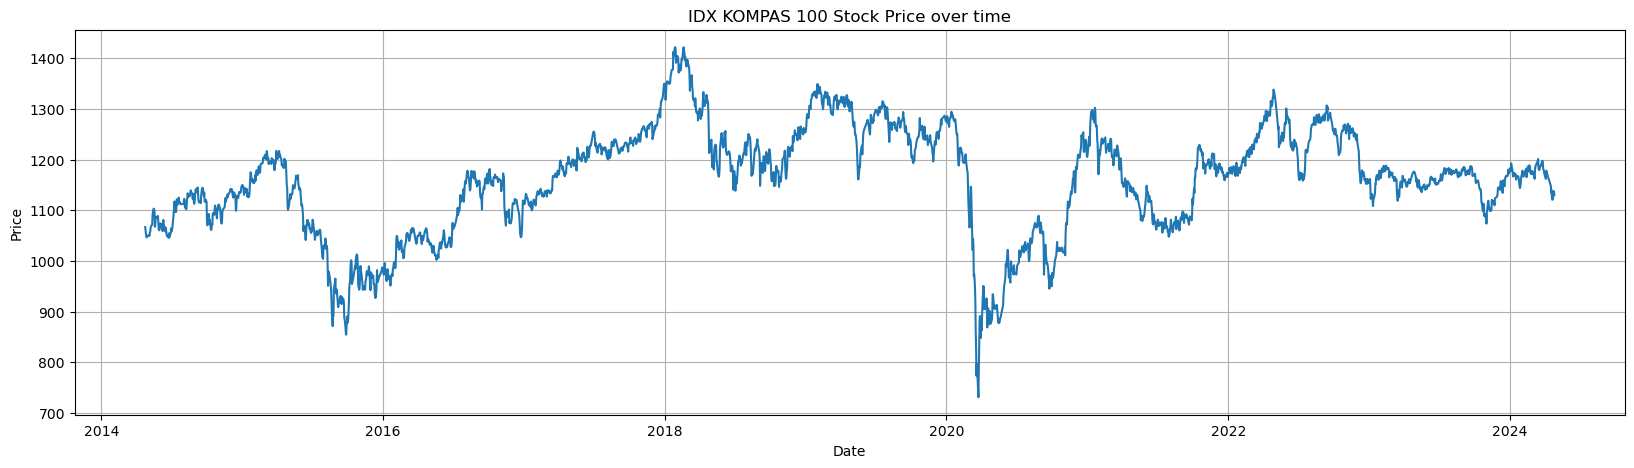

In [37]:
plt.figure(figsize=(20, 5))
plt.plot(data_full.ds, data_full['y'])  # Plotting the data
plt.title('IDX KOMPAS 100 Stock Price over time')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(True)
plt.show()

C:\Users\Imman\Documents\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


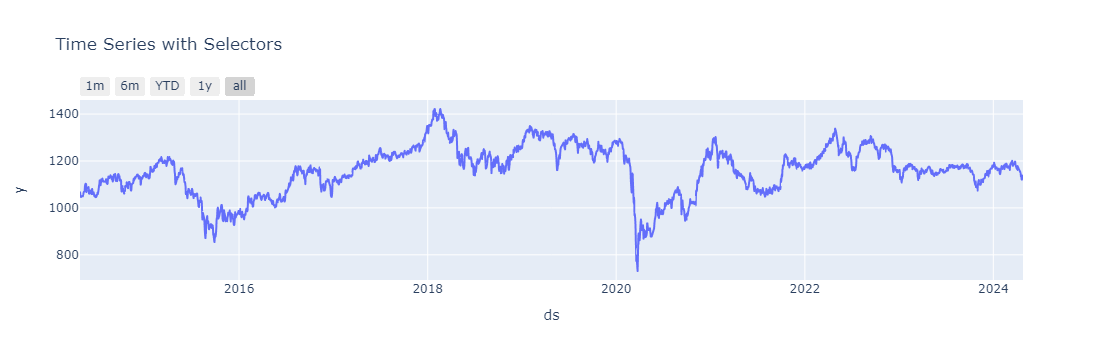

In [38]:
import plotly.express as px
import plotly.graph_objects as go
# A pro technique would be to use plotly for interactive visual and time selectors

fig = px.line(data_full, x='ds', y='y', title='Time Series with Selectors')

fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

## Static analysis

In [39]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data_full['y'])

#Ho: Data is non stationary
#H1: Data is stationary

def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(data_full['y'])

ADF Test Statistic : -3.014235320546341
p-value : 0.03358621701239272
#Lags Used : 15
Number of Observations Used : 3638
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Multivariate seasonal decompose

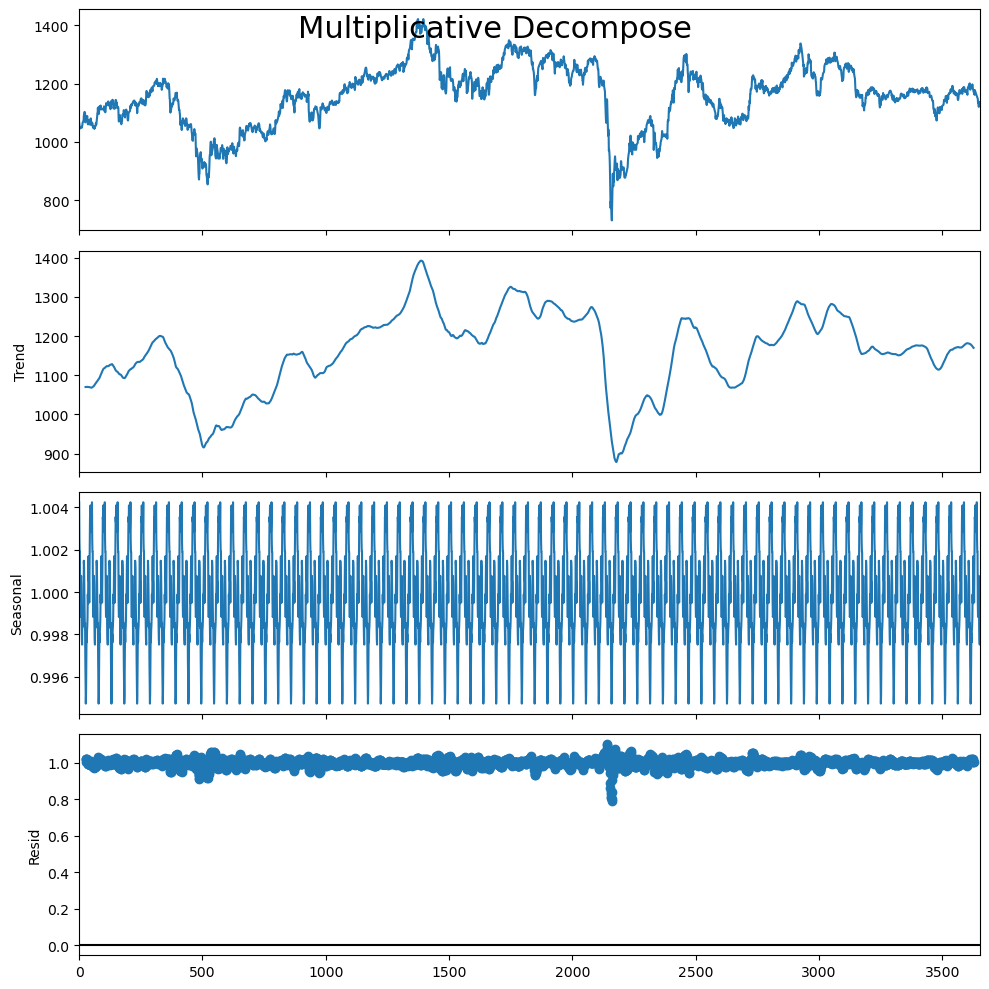

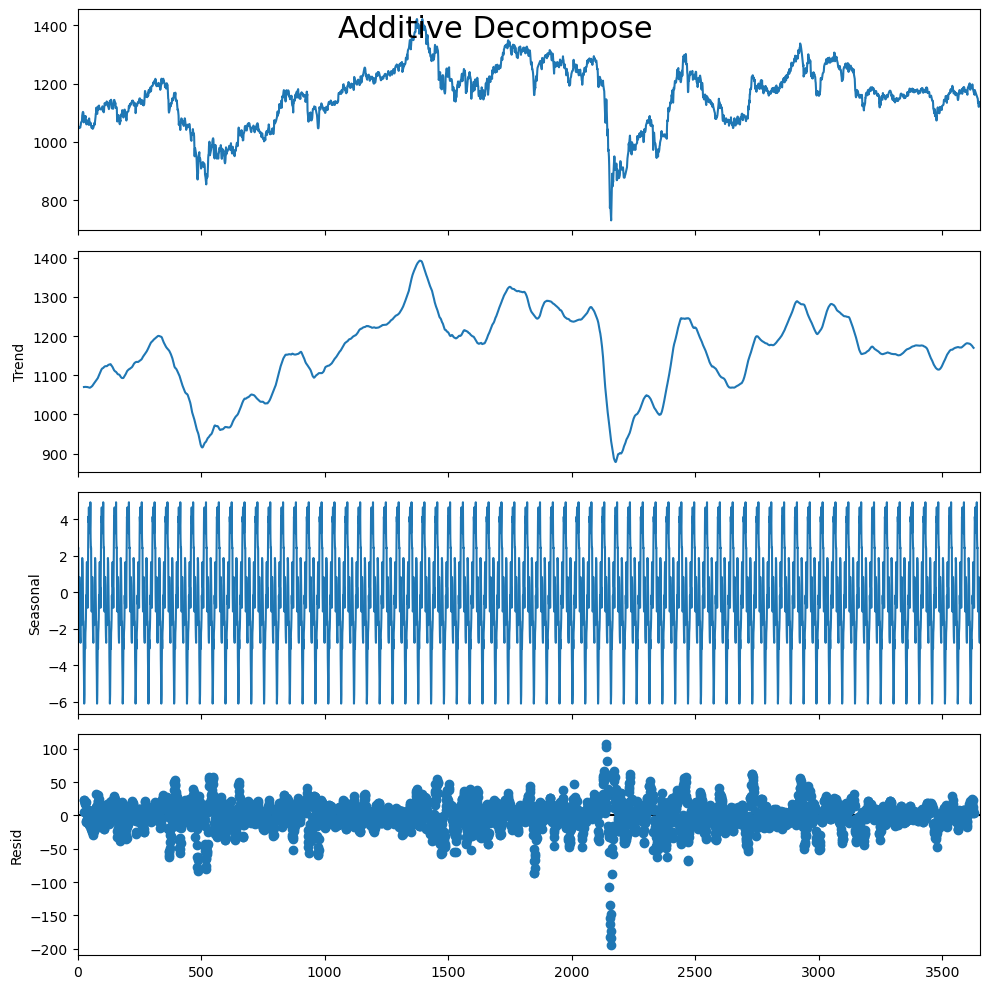

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams.update({'figure.figsize': (10,10)})
y = data_full['y'].to_frame()


# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative',period = 52)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',period = 52)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

## Shift

In [41]:
data_full['y_diff']=data_full['y']-data_full['y'].shift(1)

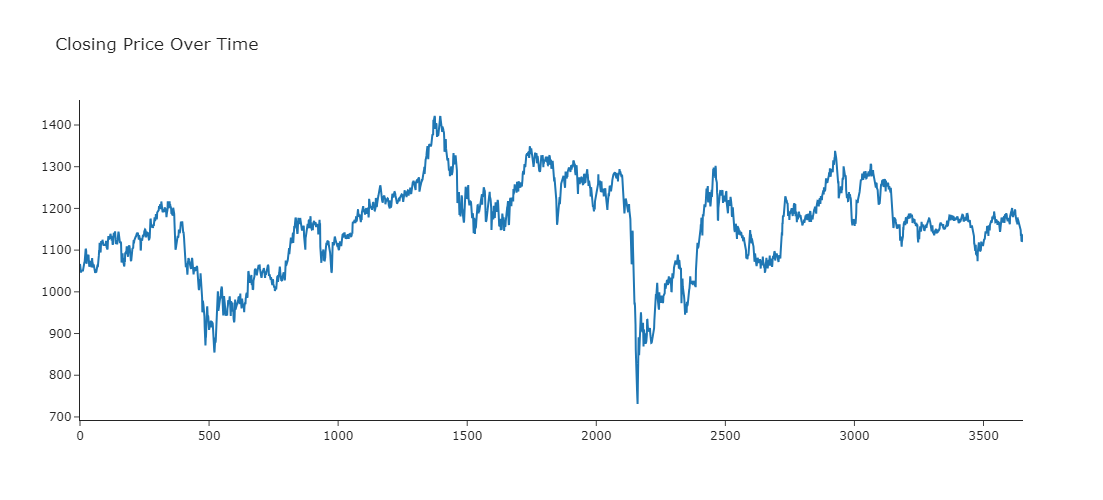

In [42]:
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=data_full.index,y=data_full.y)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='Closing Price Over Time ')
fig.show()

In [43]:
# df.reset_index(drop=True, inplace=True)
# lag_features = ["High", "Low", "Volume", "Turnover"]
# window1 = 3
# window2 = 7
# window3 = 30

# df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
# df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
# df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

# df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
# df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
# df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

# df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
# df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
# df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

# for feature in lag_features:
#     df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
#     df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
#     df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
#     df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
#     df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
#     df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

# df.fillna(df.mean(), inplace=True)

# df.set_index("Date", drop=False, inplace=True)

In [44]:
df

ds     Open     High      Low   Vol.  Change %  Year  Month  Day  \
0    2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024      4   25   
1    2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024      4   24   
2    2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024      4   23   
3    2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024      4   22   
4    2024-04-19  1132.91  1134.85  1115.94  8.17B   -0.0147  2024      4   19   
...         ...      ...      ...      ...    ...       ...   ...    ...  ...   
2430 2014-05-02  1051.20  1055.51  1049.65  2.38B    0.0001  2014      5    2   
2431 2014-04-30  1050.41  1053.13  1047.55  2.61B    0.0033  2014      4   30   
2432 2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014      4   29   
2433 2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014      4   28   
2434 2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014      4   25   

      unique_id  Day name        y  
0             1         5  1129.96  
1             2         4  1137.54  
2             3         3  1134.12  
3             4         2  1125.84  
4             5         6  1122.79  
...         ...       ...      ...  
2430       2431         6  1049.88  
2431       2432         4  1049.74  
2432       2433         3  1046.31  
2433       2434         2  1047.47  
2434       2435         6  1066.82  

[2435 rows x 12 columns]

In [45]:
data_full = data_full.drop('y_diff', axis=1)
data_full

ds     Open     High      Low   Vol.  Change %    Year  Month  \
0    2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
1    2014-04-26  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
2    2014-04-27  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
3    2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014.0    4.0   
4    2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014.0    4.0   
...         ...      ...      ...      ...    ...       ...     ...    ...   
3649 2024-04-21  1132.91  1134.85  1115.94  8.17B   -0.0147  2024.0    4.0   
3650 2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024.0    4.0   
3651 2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024.0    4.0   
3652 2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024.0    4.0   
3653 2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024.0    4.0   

       Day  unique_id  Day name            y  
0     25.0          1       6.0  1066.820000  
1     25.0          2       6.0  1058.565022  
2     25.0          3       6.0  1052.073378  
3     28.0          4       2.0  1047.470000  
4     29.0          5       3.0  1046.310000  
...    ...        ...       ...          ...  
3649  19.0       3650       6.0  1121.311137  
3650  22.0       3651       2.0  1125.840000  
3651  23.0       3652       3.0  1134.120000  
3652  24.0       3653       4.0  1137.540000  
3653  25.0       3654       5.0  1129.960000  

[3654 rows x 12 columns]

In [46]:
from sklearn.model_selection import train_test_split as TTS
df_dataCol = data_full.drop('y', axis = 1)

X = data_full[df_dataCol.columns]
Y = data_full['y']
# Y = df["Closing Price"] / df["Closing Price"].max()

X_train, X_test, Y_train, Y_test = TTS(X, Y, 
                                       test_size = 0.05, 
                                       random_state = 0,
                                       shuffle=False)

In [47]:
df_train = X_train.join(Y_train)
df_train

ds     Open     High      Low   Vol.  Change %    Year  Month  \
0    2014-04-25  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
1    2014-04-26  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
2    2014-04-27  1066.73  1072.63  1066.05  2.78B    0.0007  2014.0    4.0   
3    2014-04-28  1066.31  1067.97  1047.47  2.52B   -0.0181  2014.0    4.0   
4    2014-04-29  1045.15  1047.86  1041.67  2.52B   -0.0011  2014.0    4.0   
...         ...      ...      ...      ...    ...       ...     ...    ...   
3466 2023-10-21  1111.30  1119.65  1108.50  8.18B   -0.0002  2023.0   10.0   
3467 2023-10-22  1111.30  1119.65  1108.50  8.18B   -0.0002  2023.0   10.0   
3468 2023-10-23  1114.85  1115.94  1094.92  6.90B   -0.0149  2023.0   10.0   
3469 2023-10-24  1098.20  1116.20  1098.20  4.53B    0.0119  2023.0   10.0   
3470 2023-10-25  1115.41  1123.69  1112.33  4.90B    0.0011  2023.0   10.0   

       Day  unique_id  Day name            y  
0     25.0          1       6.0  1066.820000  
1     25.0          2       6.0  1058.565022  
2     25.0          3       6.0  1052.073378  
3     28.0          4       2.0  1047.470000  
4     29.0          5       3.0  1046.310000  
...    ...        ...       ...          ...  
3466  20.0       3467       6.0  1109.220805  
3467  20.0       3468       6.0  1101.806590  
3468  23.0       3469       2.0  1098.240000  
3469  24.0       3470       3.0  1111.330000  
3470  25.0       3471       4.0  1112.600000  

[3471 rows x 12 columns]

In [48]:
df_test = X_test.join(Y_test)
df_test

ds     Open     High      Low   Vol.  Change %    Year  Month  \
3471 2023-10-26  1108.16  1108.40  1088.71  7.16B   -0.0215  2023.0   10.0   
3472 2023-10-27  1091.08  1098.81  1089.82  7.08B    0.0039  2023.0   10.0   
3473 2023-10-28  1091.08  1098.81  1089.82  7.08B    0.0039  2023.0   10.0   
3474 2023-10-29  1091.08  1098.81  1089.82  7.08B    0.0039  2023.0   10.0   
3475 2023-10-30  1092.90  1093.99  1079.59  6.31B   -0.0065  2023.0   10.0   
...         ...      ...      ...      ...    ...       ...     ...    ...   
3649 2024-04-21  1132.91  1134.85  1115.94  8.17B   -0.0147  2024.0    4.0   
3650 2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024.0    4.0   
3651 2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024.0    4.0   
3652 2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024.0    4.0   
3653 2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024.0    4.0   

       Day  unique_id  Day name            y  
3471  26.0       3472       5.0  1088.710000  
3472  27.0       3473       6.0  1092.940000  
3473  27.0       3474       6.0  1090.857800  
3474  27.0       3475       6.0  1087.753182  
3475  30.0       3476       2.0  1085.850000  
...    ...        ...       ...          ...  
3649  19.0       3650       6.0  1121.311137  
3650  22.0       3651       2.0  1125.840000  
3651  23.0       3652       3.0  1134.120000  
3652  24.0       3653       4.0  1137.540000  
3653  25.0       3654       5.0  1129.960000  

[183 rows x 12 columns]

In [49]:
holidays_df

holiday         ds            y
0     2014Apr26 2014-04-26  1058.565022
1     2014Apr27 2014-04-27  1052.073378
2     2014May01 2014-05-01  1049.819997
3     2014May03 2014-05-03  1050.299640
4     2014May04 2014-05-04  1050.833047
...         ...        ...          ...
1214  2024Apr13 2024-04-13  1155.706799
1215  2024Apr14 2024-04-14  1153.212055
1216  2024Apr15 2024-04-15  1150.636673
1217  2024Apr20 2024-04-20  1120.583971
1218  2024Apr21 2024-04-21  1121.311137

[1219 rows x 3 columns]

In [50]:
# #FB model
# m = Prophet(holidays = holidays,
#             seasonality_mode = 'multiplicative',
#             seasonality_prior_scale = 10,
#             holidays_prior_scale = 10,
#             changepoint_prior_scale = 0.05)
# # m.add_regressor('regressor_1')
# # m.add_regressor('regressor_2')
# m.fit(df)

In [51]:
from statsforecast.adapters.prophet import AutoARIMAProphet
from tqdm import tqdm

start = time.time()
# Initialize the AutoARIMAProphet model configurations
model_config = {
    "growth": "logistic",
    "yearly_seasonality": True,
    # "weekly_seasonality": True,
    # "daily_seasonality" : False,
    # "holidays": holidays_df
    "seasonality_mode": "multiplicative",
    "seasonality_prior_scale": 10,
    "holidays_prior_scale": 10,
    "changepoint_prior_scale": 0.05,
    "interval_width": 0.75,
    "uncertainty_samples": 1000
}

cap = 10
floor = 5.5

# Instantiate models
aap = AutoARIMAProphet(**model_config)
aapM2 = AutoARIMAProphet(**model_config)

df_train['cap'] = cap
df_train['floor'] = floor

# Fit the first model
with tqdm(total=1, desc="Fitting First Model") as pbar:
    aap1 = aap.fit(df_train, disable_seasonal_features=False)
    pbar.update(1)
    
# aap = aap.fit(df_train)
print("Train:", time.time() - start)

combined_df = pd.concat([df_train, df_test])

df_train['cap'] = cap
df_train['floor'] = floor

df_test['cap'] = cap
df_test['floor'] = floor

# with tqdm(total=100, desc="Making Predictions") as pbar:
#     aap_pred_test = aap1.predict(df_test)
#     aap_pred_train = aap1.predict(df_train)
#     pbar.update(100)

combined_df['cap'] = cap
combined_df['floor'] = floor

# Fit the second model
with tqdm(total=1, desc="Fitting Second Model") as pbar:
    aap2 = aapM2.fit(combined_df, disable_seasonal_features=False)
    pbar.update(1)


aap_pred_forecast = aap2.make_future_dataframe(periods = 1826, freq = 'D', include_history = True)
aap_pred_forecast['cap'] = cap
aap_pred_forecast['floor'] = floor

# Making predictions
with tqdm(total=2, desc="Making Predictions") as pbar:
    aap_pred_test = aap1.predict(df_test)
    aap_pred_train = aap1.predict(df_train)
    aap_pred_forecast = aap2.predict(aap_pred_forecast)
    pbar.update(2)

print("Pred:", time.time() - start)

Fitting First Model: 100%|██████████| 1/1 [00:29<00:00, 29.33s/it]


Train: 29.685745000839233


Making Predictions: 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

Pred: 46.18716096878052


In [52]:
# aap_pred_forecast = aap.make_future_dataframe(periods = 1826, freq = 'D', include_history = True)
# aap_pred_forecast = aap.predict(aap_pred_forecast)

In [53]:
# import time
# import numpy as np
# import pandas as pd
# from statsforecast.adapters.prophet import AutoARIMAProphet
# from sklearn.model_selection import ParameterGrid

# start = time.time()
# param_grid = {
#     'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
#     'seasonality_prior_scale': [0.01, 1, 10],
#     'holidays_prior_scale': [0.01, 1, 10],
#     'seasonality_mode': ['additive', 'multiplicative']
# }

# # Setup grid search
# best_mape = float('inf')
# best_params = {}

# for params in ParameterGrid(param_grid):
#     aap = AutoARIMAProphet(
#         holidays=holidays_df,
#         seasonality_mode=params['seasonality_mode'],
#         seasonality_prior_scale=params['seasonality_prior_scale'],
#         holidays_prior_scale=params['holidays_prior_scale'],
#         changepoint_prior_scale=params['changepoint_prior_scale'],
#         interval_width=0.75,
#         uncertainty_samples=1000
#     )
#     aap.fit(df_train,disable_seasonal_features=False)
    
#     aap_pred = aap.predict(df_test)
#     mape = MAPE(df_test['y'], aap_pred['yhat'])
    
#     if mape < best_mape:
#         best_mape = mape
#         best_params = params

#     print(f"Tested: {params}, MAPE: {mape}")

# # Output the best performing model parameters
# print("Best MAPE:", best_mape)
# print("Best Parameters:", best_params)

# stop = time.time()
# print(stop - start)

In [54]:
# params_grid = {'seasonality_mode': ['multiplicative','additive'],
#                'growth': ['linear', 'flat'], 
#                'changepoint_prior_scale': [0.1, 0.2, 0.3, 0.4, 0.5], 
#                'n_changepoints': [5, 10, 15, 20]} 
# grid = ParameterGrid(params_grid)


In [55]:
# from statsforecast.adapters.prophet import AutoARIMAProphet
# model = AutoARIMAProphet()
# model = model.fit(df_train)
# horizon = 7
# future = model.make_future_dataframe(horizon)
# forecat = model.predict(future)
# fig = model.plot(forecast)

In [56]:
aap_pred_forecast

ds         yhat   yhat_lower   yhat_upper
0    2014-04-25  1065.755201  1055.302125  1076.208278
1    2014-04-26  1064.273388  1053.820312  1074.726465
2    2014-04-27  1054.781219  1044.328142  1065.234295
3    2014-04-28  1049.114808  1038.661732  1059.567885
4    2014-04-29  1045.415238  1034.962161  1055.868315
...         ...          ...          ...          ...
5475 2029-04-21  1135.233669   612.283615  1658.183723
5476 2029-04-22  1133.202159   610.108593  1656.295724
5477 2029-04-23  1131.411787   608.174749  1654.648824
5478 2029-04-24  1130.248266   606.867795  1653.628736
5479 2029-04-25  1128.925944   605.402080  1652.449808

[5480 rows x 4 columns]

## Excel

In [57]:
# Write DataFrame to Excel
# aap_pred_forecast.to_excel('AAP_Prediction_Forecast_IDX_KOMPAS_100.xlsx', sheet_name='Forecast', index=False)

In [58]:
df_test

ds     Open     High      Low   Vol.  Change %    Year  Month  \
3471 2023-10-26  1108.16  1108.40  1088.71  7.16B   -0.0215  2023.0   10.0   
3472 2023-10-27  1091.08  1098.81  1089.82  7.08B    0.0039  2023.0   10.0   
3473 2023-10-28  1091.08  1098.81  1089.82  7.08B    0.0039  2023.0   10.0   
3474 2023-10-29  1091.08  1098.81  1089.82  7.08B    0.0039  2023.0   10.0   
3475 2023-10-30  1092.90  1093.99  1079.59  6.31B   -0.0065  2023.0   10.0   
...         ...      ...      ...      ...    ...       ...     ...    ...   
3649 2024-04-21  1132.91  1134.85  1115.94  8.17B   -0.0147  2024.0    4.0   
3650 2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024.0    4.0   
3651 2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024.0    4.0   
3652 2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024.0    4.0   
3653 2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024.0    4.0   

       Day  unique_id  Day name            y  cap  floor  
3471  26.0       3472       5.0  1088.710000   10    5.5  
3472  27.0       3473       6.0  1092.940000   10    5.5  
3473  27.0       3474       6.0  1090.857800   10    5.5  
3474  27.0       3475       6.0  1087.753182   10    5.5  
3475  30.0       3476       2.0  1085.850000   10    5.5  
...    ...        ...       ...          ...  ...    ...  
3649  19.0       3650       6.0  1121.311137   10    5.5  
3650  22.0       3651       2.0  1125.840000   10    5.5  
3651  23.0       3652       3.0  1134.120000   10    5.5  
3652  24.0       3653       4.0  1137.540000   10    5.5  
3653  25.0       3654       5.0  1129.960000   10    5.5  

[183 rows x 14 columns]

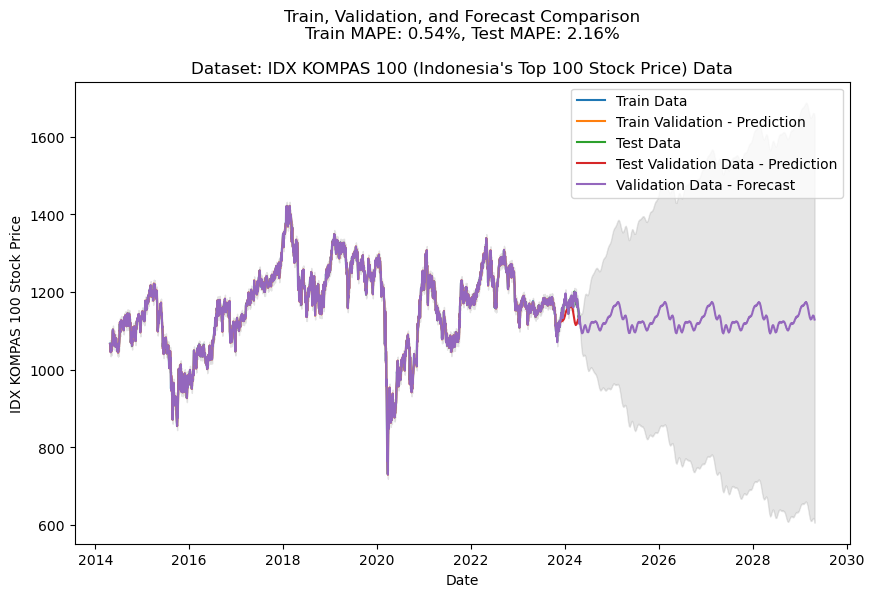

In [59]:
plt.figure(figsize=(10, 6))

plt.plot(df_train['ds'], df_train['y'], label='Train Data')
plt.plot(aap_pred_train['ds'], aap_pred_train['yhat'], label='Train Validation - Prediction')

plt.plot(df_test['ds'], df_test['y'], label='Test Data')
plt.plot(aap_pred_test['ds'], aap_pred_test['yhat'], label='Test Validation Data - Prediction')

# plt.plot(df_test['ds'], df_test['y'], label='Test Data')
plt.plot(aap_pred_forecast['ds'], aap_pred_forecast['yhat'], label='Validation Data - Forecast')


plt.fill_between(aap_pred_forecast['ds'], aap_pred_forecast['yhat_lower'], aap_pred_forecast['yhat_upper'], color='gray', alpha=0.2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('IDX KOMPAS 100 Stock Price')
mape_train = MAPE(df_train['y'], aap_pred_train['yhat'])
mape_test = MAPE(df_test['y'], aap_pred_test['yhat'])
# mape_forecast = MAPE(df_test['y'], aap_pred_forecast['yhat'])

# Dataset name
dataset_name = "IDX KOMPAS 100 (Indonesia's Top 100 Stock Price) Data"

# Add MAPE and dataset name to the title with improved spacing
plt.title(f'Train, Validation, and Forecast Comparison\n'
          f'Train MAPE: {mape_train}%, Test MAPE: {mape_test}%\n\n'
          f'Dataset: {dataset_name}')
plt.show()

In [60]:
aap_pred_forecast

ds         yhat   yhat_lower   yhat_upper
0    2014-04-25  1065.755201  1055.302125  1076.208278
1    2014-04-26  1064.273388  1053.820312  1074.726465
2    2014-04-27  1054.781219  1044.328142  1065.234295
3    2014-04-28  1049.114808  1038.661732  1059.567885
4    2014-04-29  1045.415238  1034.962161  1055.868315
...         ...          ...          ...          ...
5475 2029-04-21  1135.233669   612.283615  1658.183723
5476 2029-04-22  1133.202159   610.108593  1656.295724
5477 2029-04-23  1131.411787   608.174749  1654.648824
5478 2029-04-24  1130.248266   606.867795  1653.628736
5479 2029-04-25  1128.925944   605.402080  1652.449808

[5480 rows x 4 columns]

In [61]:
MAPE(df_train['y'], aap_pred_train['yhat'])
MAPE(df_test['y'], aap_pred_test['yhat'])

print("Train Error: ", MAPE(df_train['y'], aap_pred_train['yhat']), "\n Test Error: ", MAPE(df_test['y'], aap_pred_test['yhat']))

Train Error:  0.54 
 Test Error:  2.16


In [62]:
from prophet.serialize import model_to_json, model_from_json
# from statsforecast.adapters.prophet import AutoARIMAProphet
# # from statsforecast.adapters.prophet.AutoARIMAProphet import model_to_json
# from AutoARIMAProphet import model_to_json

In [63]:
df_test

ds     Open     High      Low   Vol.  Change %    Year  Month  \
3471 2023-10-26  1108.16  1108.40  1088.71  7.16B   -0.0215  2023.0   10.0   
3472 2023-10-27  1091.08  1098.81  1089.82  7.08B    0.0039  2023.0   10.0   
3473 2023-10-28  1091.08  1098.81  1089.82  7.08B    0.0039  2023.0   10.0   
3474 2023-10-29  1091.08  1098.81  1089.82  7.08B    0.0039  2023.0   10.0   
3475 2023-10-30  1092.90  1093.99  1079.59  6.31B   -0.0065  2023.0   10.0   
...         ...      ...      ...      ...    ...       ...     ...    ...   
3649 2024-04-21  1132.91  1134.85  1115.94  8.17B   -0.0147  2024.0    4.0   
3650 2024-04-22  1126.13  1131.50  1117.09  5.89B    0.0027  2024.0    4.0   
3651 2024-04-23  1131.71  1144.23  1130.75  6.95B    0.0074  2024.0    4.0   
3652 2024-04-24  1137.51  1142.94  1132.17  6.39B    0.0030  2024.0    4.0   
3653 2024-04-25  1136.70  1137.47  1128.86  5.41B   -0.0067  2024.0    4.0   

       Day  unique_id  Day name            y  cap  floor  
3471  26.0       3472       5.0  1088.710000   10    5.5  
3472  27.0       3473       6.0  1092.940000   10    5.5  
3473  27.0       3474       6.0  1090.857800   10    5.5  
3474  27.0       3475       6.0  1087.753182   10    5.5  
3475  30.0       3476       2.0  1085.850000   10    5.5  
...    ...        ...       ...          ...  ...    ...  
3649  19.0       3650       6.0  1121.311137   10    5.5  
3650  22.0       3651       2.0  1125.840000   10    5.5  
3651  23.0       3652       3.0  1134.120000   10    5.5  
3652  24.0       3653       4.0  1137.540000   10    5.5  
3653  25.0       3654       5.0  1129.960000   10    5.5  

[183 rows x 14 columns]

In [64]:
aap_pred_test

ds         yhat   yhat_lower   yhat_upper
0   2023-10-26  1112.789041  1102.219001  1123.359081
1   2023-10-27  1113.040033  1096.698468  1129.381598
2   2023-10-28  1112.782466  1092.230878  1133.334053
3   2023-10-29  1112.246566  1088.211410  1136.281723
4   2023-10-30  1112.052307  1084.978155  1139.126460
..         ...          ...          ...          ...
178 2024-04-21  1126.243889   959.633976  1292.853801
179 2024-04-22  1124.671124   957.595740  1291.746508
180 2024-04-23  1123.654419   956.114857  1291.193981
181 2024-04-24  1122.618944   954.616485  1290.621402
182 2024-04-25  1120.941542   952.477460  1289.405624

[183 rows x 4 columns]

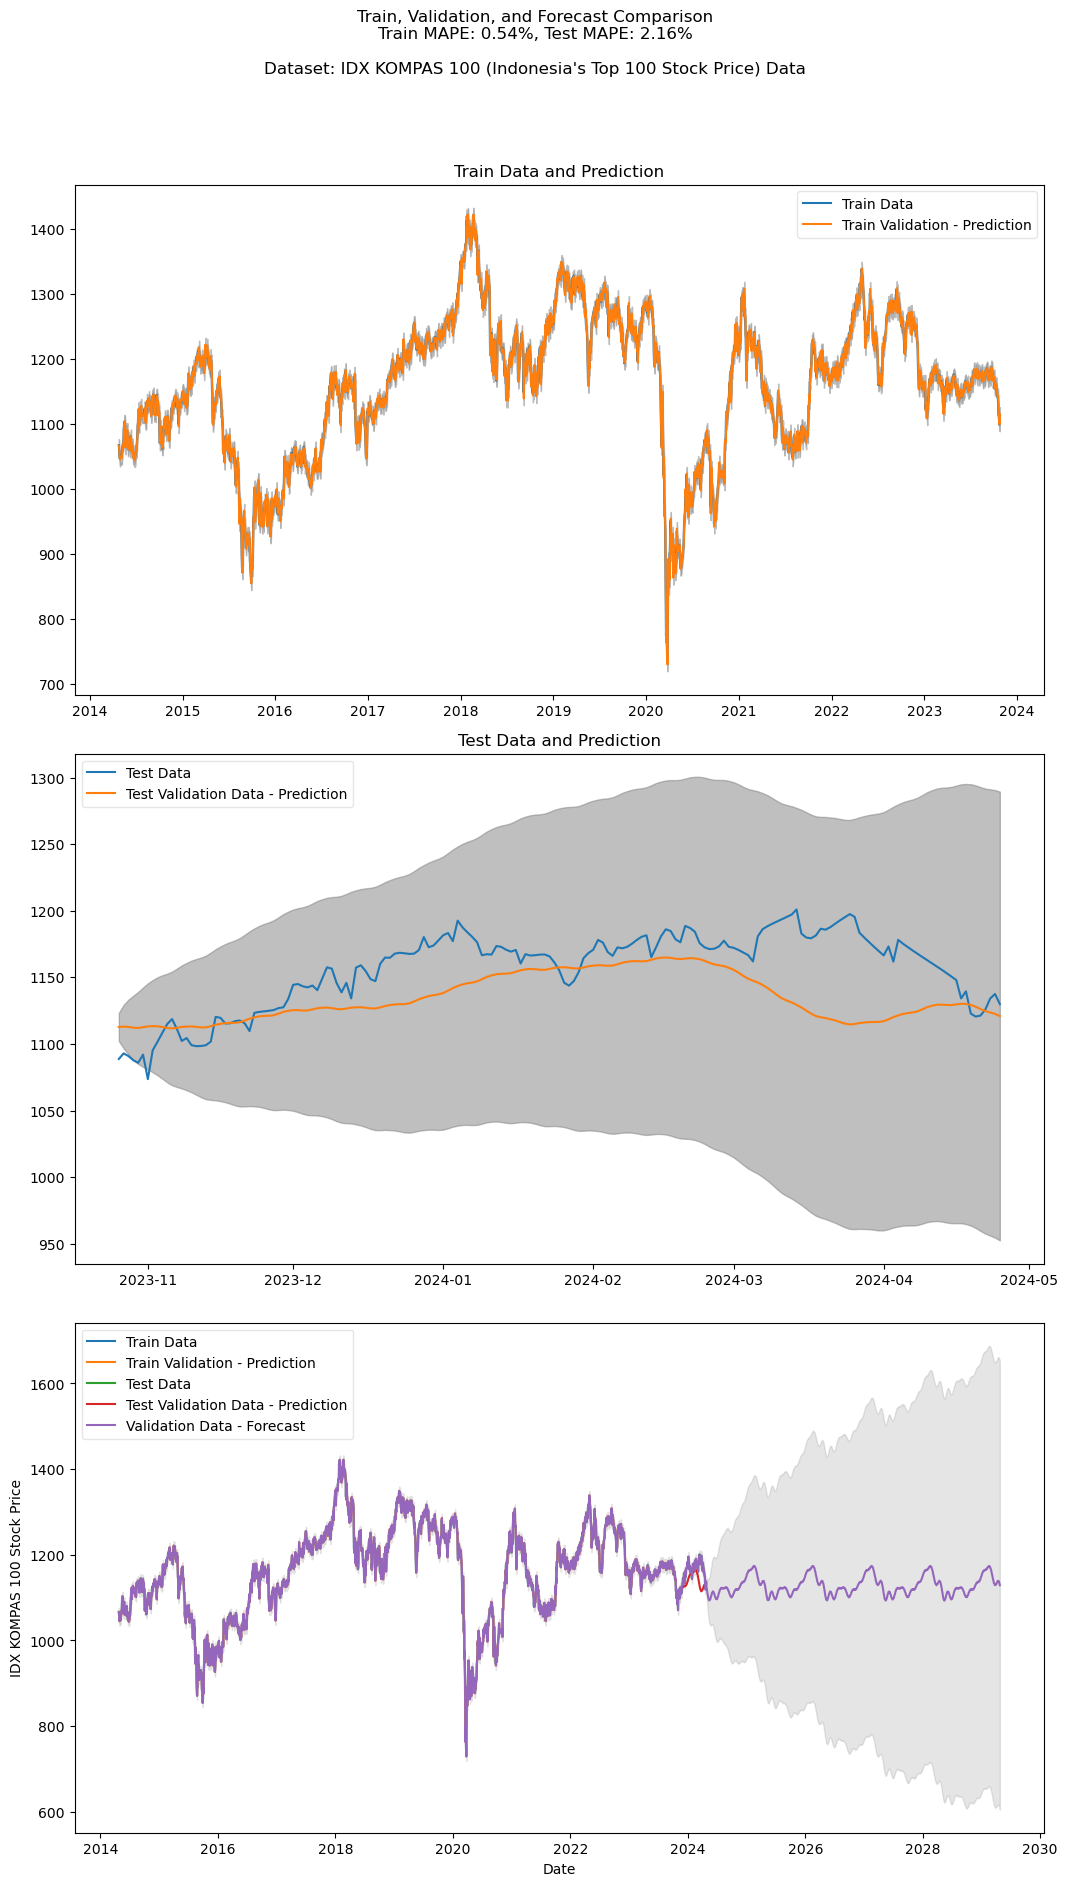

In [65]:
import matplotlib.pyplot as plt

# Set the DPI for 1920x1080 resolution
dpi = 100  # You can adjust this DPI value as needed for better quality

# Create a figure and 3 subplots, with minimal spacing
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10.8, 19.2), sharex=False)

# Adjust the spacing between plots
plt.subplots_adjust(hspace=0.3)  # Adjust horizontal spacing

# --------------------- First Plot (Top Plot) -------------------------------------------
ax1.plot(df_train['ds'], df_train['y'], label='Train Data')
ax1.plot(aap_pred_train['ds'], aap_pred_train['yhat'], label='Train Validation - Prediction')
ax1.fill_between(aap_pred_train['ds'], aap_pred_train['yhat_lower'], aap_pred_train['yhat_upper'], color='gray', alpha=0.5)
ax1.legend(loc='upper right', fontsize='medium', fancybox=True, framealpha=0.5)
ax1.set_title('Train Data and Prediction')

# --------------------- Second Plot (Middle Plot) ---------------------------------------
ax2.plot(df_test['ds'], df_test['y'], label='Test Data')
ax2.plot(aap_pred_test['ds'], aap_pred_test['yhat'], label='Test Validation Data - Prediction')
ax2.fill_between(aap_pred_test['ds'], aap_pred_test['yhat_lower'], aap_pred_test['yhat_upper'], color='gray', alpha=0.5)
ax2.legend(loc='upper left', fontsize='medium', fancybox=True, framealpha=0.5)
ax2.set_title('Test Data and Prediction')

# --------------------- Third Plot (Bottom Plot) -----------------------------------------
ax3.plot(df_train['ds'], df_train['y'], label='Train Data')
ax3.plot(aap_pred_train['ds'], aap_pred_train['yhat'], label='Train Validation - Prediction')
ax3.plot(df_test['ds'], df_test['y'], label='Test Data')
ax3.plot(aap_pred_test['ds'], aap_pred_test['yhat'], label='Test Validation Data - Prediction')
ax3.plot(aap_pred_forecast['ds'], aap_pred_forecast['yhat'], label='Validation Data - Forecast')
ax3.fill_between(aap_pred_forecast['ds'], aap_pred_forecast['yhat_lower'], aap_pred_forecast['yhat_upper'], color='gray', alpha=0.2)
ax3.legend(loc='upper left', fontsize='medium', fancybox=True, framealpha=0.5)
ax3.set_xlabel('Date')
ax3.set_ylabel('IDX KOMPAS 100 Stock Price')
mape_train = MAPE(df_train['y'], aap_pred_train['yhat'])
mape_test = MAPE(df_test['y'], aap_pred_test['yhat'])
# mape_forecast = MAPE(df_test['y'], aap_pred_forecast['yhat'])

# Dataset name
dataset_name = "IDX KOMPAS 100 (Indonesia's Top 100 Stock Price) Data"

# Add MAPE and dataset name to the title with improved spacing
plt.suptitle(f'Train, Validation, and Forecast Comparison\n'
             f'Train MAPE: {mape_train}%, Test MAPE: {mape_test}%\n\n'
             f'Dataset: {dataset_name}', y=0.98)  # Adjust the y position

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the bottom and top space

# Save the figure with the desired resolution
plt.savefig('IDX_KOMPAS_100_Plot_1080_1920.png', dpi=dpi)

# Show the plot
plt.show()


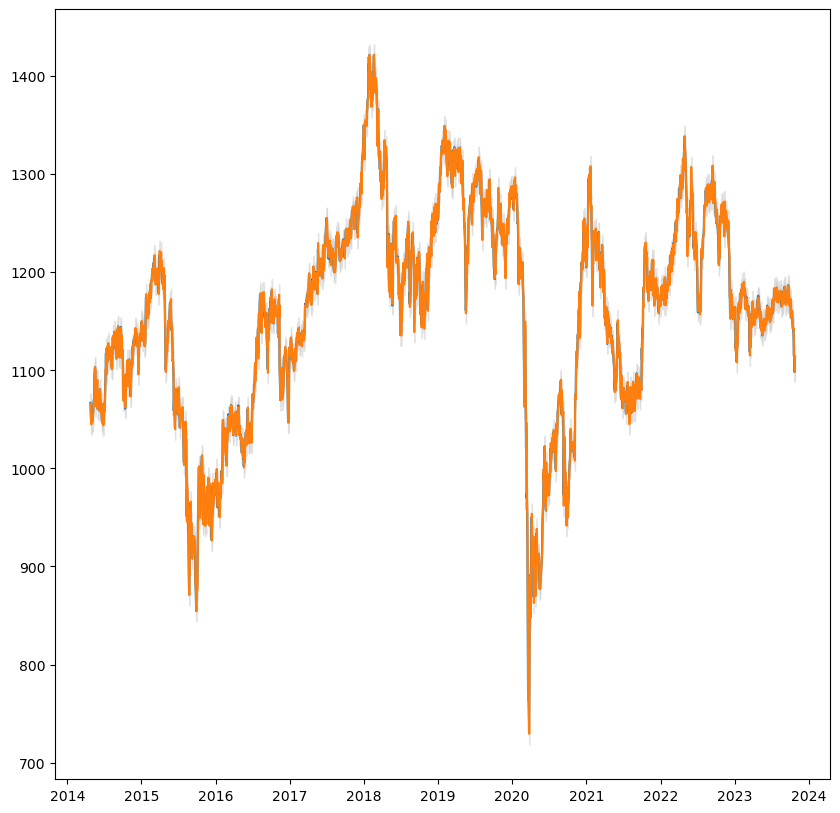

In [66]:
plt.plot(df_train['ds'], df_train['y'], label='Train Data')
plt.plot(aap_pred_train['ds'], aap_pred_train['yhat'], label='Train Validation - Prediction')
plt.fill_between(aap_pred_train['ds'], aap_pred_train['yhat_lower'], aap_pred_train['yhat_upper'], color='gray', alpha=0.2)


## Attempts to save the model

In [67]:
import pickle

def save_model(model, filename):
    """Save the trained model to a file."""
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

def load_model(filename):
    """Load a trained model from a file."""
    with open(filename, 'rb') as file:
        return pickle.load(file)


In [68]:
# save_model(aap1, 'aap1_IDX KOMPAS 100_Logistic.pkl')  # Save the first model

In [69]:
# save_model(aap2, 'aap2_IDX KOMPAS 100_Logistic.pkl')  # Save the second model

In [70]:
loaded_aap1 = load_model('aap1_IDX KOMPAS 100_Logistic.pkl')
loaded_aap2 = load_model('aap2_IDX KOMPAS 100_Logistic.pkl')

In [71]:
aap_pred_forecast = loaded_aap2.make_future_dataframe(periods = 1826, freq = 'D', include_history = True)
aap_pred_forecast['cap'] = cap
aap_pred_forecast['floor'] = floor

In [72]:
aap_pred_test = loaded_aap1.predict(df_test)
aap_pred_train = loaded_aap1.predict(df_train)
aap_pred_forecast = loaded_aap2.predict(aap_pred_forecast)

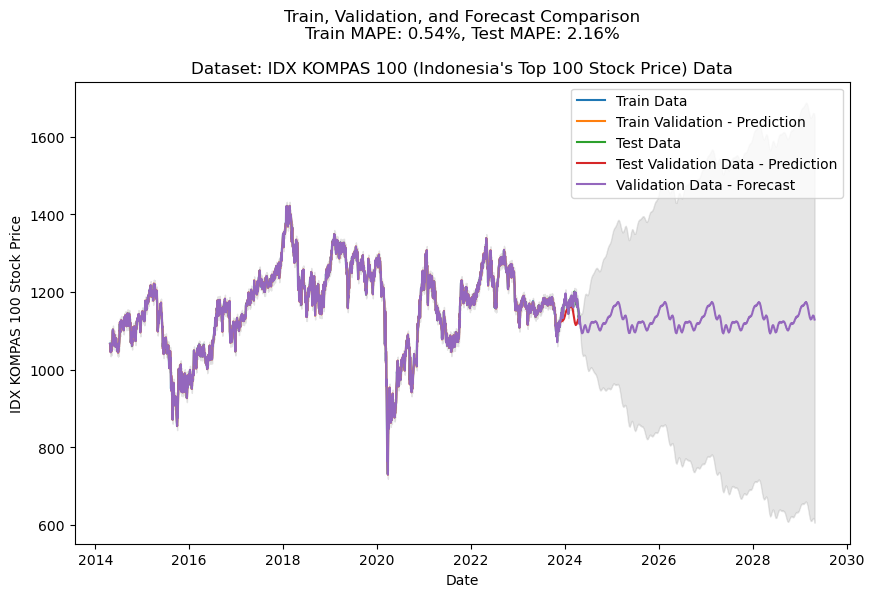

In [73]:
plt.figure(figsize=(10, 6))

plt.plot(df_train['ds'], df_train['y'], label='Train Data')
plt.plot(aap_pred_train['ds'], aap_pred_train['yhat'], label='Train Validation - Prediction')

plt.plot(df_test['ds'], df_test['y'], label='Test Data')
plt.plot(aap_pred_test['ds'], aap_pred_test['yhat'], label='Test Validation Data - Prediction')

# plt.plot(df_test['ds'], df_test['y'], label='Test Data')
plt.plot(aap_pred_forecast['ds'], aap_pred_forecast['yhat'], label='Validation Data - Forecast')


plt.fill_between(aap_pred_forecast['ds'], aap_pred_forecast['yhat_lower'], aap_pred_forecast['yhat_upper'], color='gray', alpha=0.2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('IDX KOMPAS 100 Stock Price')
mape_train = MAPE(df_train['y'], aap_pred_train['yhat'])
mape_test = MAPE(df_test['y'], aap_pred_test['yhat'])
# mape_forecast = MAPE(df_test['y'], aap_pred_forecast['yhat'])

# Dataset name
dataset_name = "IDX KOMPAS 100 (Indonesia's Top 100 Stock Price) Data"

# Add MAPE and dataset name to the title with improved spacing
plt.title(f'Train, Validation, and Forecast Comparison\n'
          f'Train MAPE: {mape_train}%, Test MAPE: {mape_test}%\n\n'
          f'Dataset: {dataset_name}')
plt.show()

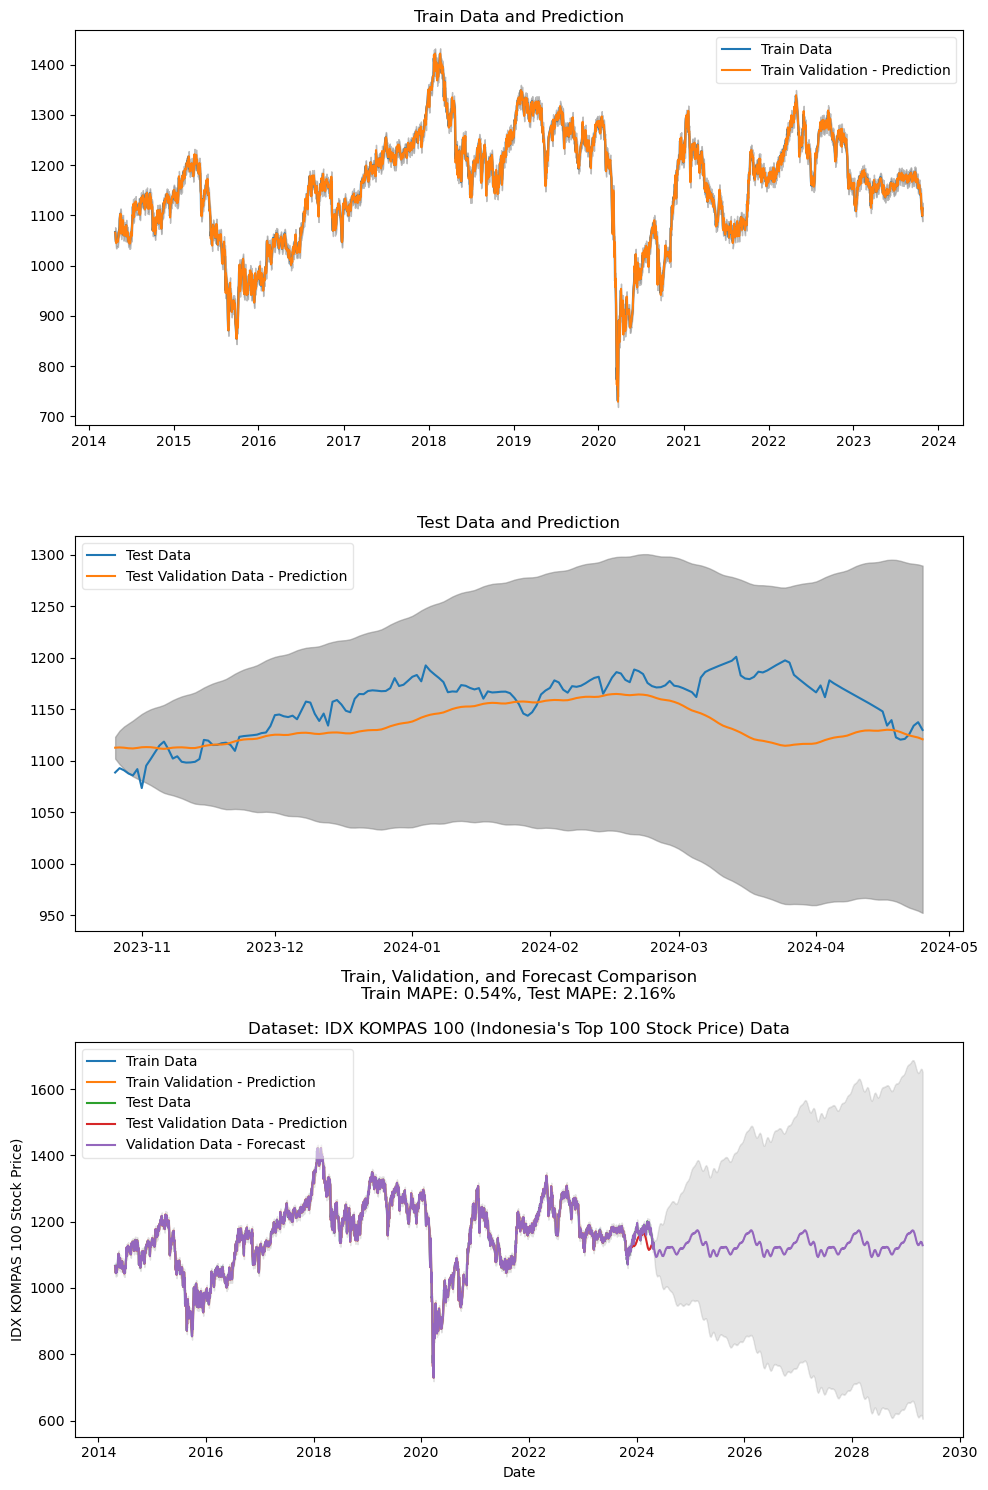

In [74]:
import matplotlib.pyplot as plt
# Create a figure and 3 subplots, with minimal spacing
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=False)

# Adjust the spacing between plots
plt.subplots_adjust(hspace=0.3)  # Adjust horizontal spacing

# --------------------- First Plot (Top Plot) -------------------------------------------
ax1.plot(df_train['ds'], df_train['y'], label='Train Data')
ax1.plot(aap_pred_train['ds'], aap_pred_train['yhat'], label='Train Validation - Prediction')
ax1.fill_between(aap_pred_train['ds'], aap_pred_train['yhat_lower'], aap_pred_train['yhat_upper'], color='gray', alpha=0.5)
ax1.legend(loc='upper right', fontsize='medium', fancybox=True, framealpha=0.5)
ax1.set_title('Train Data and Prediction')

# --------------------- Second Plot (Middle Plot) ---------------------------------------
ax2.plot(df_test['ds'], df_test['y'], label='Test Data')
ax2.plot(aap_pred_test['ds'], aap_pred_test['yhat'], label='Test Validation Data - Prediction')
ax2.fill_between(aap_pred_test['ds'], aap_pred_test['yhat_lower'], aap_pred_test['yhat_upper'], color='gray', alpha=0.5)
ax2.legend(loc='upper left', fontsize='medium', fancybox=True, framealpha=0.5)
ax2.set_title('Test Data and Prediction')

# --------------------- Third Plot (Bottom Plot) -----------------------------------------
ax3.plot(df_train['ds'], df_train['y'], label='Train Data')
ax3.plot(aap_pred_train['ds'], aap_pred_train['yhat'], label='Train Validation - Prediction')
ax3.plot(df_test['ds'], df_test['y'], label='Test Data')
ax3.plot(aap_pred_test['ds'], aap_pred_test['yhat'], label='Test Validation Data - Prediction')
ax3.plot(aap_pred_forecast['ds'], aap_pred_forecast['yhat'], label='Validation Data - Forecast')
ax3.fill_between(aap_pred_forecast['ds'], aap_pred_forecast['yhat_lower'], aap_pred_forecast['yhat_upper'], color='gray', alpha=0.2)
ax3.legend(loc='upper left', fontsize='medium', fancybox=True, framealpha=0.5)
ax3.set_xlabel('Date')
ax3.set_ylabel('IDX KOMPAS 100 Stock Price)')
mape_train = MAPE(df_train['y'], aap_pred_train['yhat'])
mape_test = MAPE(df_test['y'], aap_pred_test['yhat'])
# mape_forecast = MAPE(df_test['y'], aap_pred_forecast['yhat'])

# Dataset name
dataset_name = "IDX KOMPAS 100 (Indonesia's Top 100 Stock Price) Data"

# Add MAPE and dataset name to the title with improved spacing
plt.title(f'Train, Validation, and Forecast Comparison\n'
          f'Train MAPE: {mape_train}%, Test MAPE: {mape_test}%\n\n'
          f'Dataset: {dataset_name}')

# Show the plot
plt.tight_layout()
plt.show()


In [75]:
MAPE(df_train['y'], aap_pred_train['yhat'])

print("Train Error: ", MAPE(df_train['y'], aap_pred_train['yhat']), "\n Test Error: ", MAPE(df_test['y'], aap_pred_test['yhat']))

Train Error:  0.54 
 Test Error:  2.16
